# Secondary structure prediction


In [1]:
data = {
    'esm1b_t33_650M_UR50S' : {
        'casp12': { 'q8': 0.6774, 'q3': 0.7922},
        'cb513' : { 'q8': 0.7197, 'q3': 0.8419},
        'ts115' : { 'q8': 0.7515, 'q3': 0.8515},
    },
    'esm2_t6_8M_UR50D' : {
        'casp12': { 'q8': 0.6160, 'q3': 0.7259},
        'cb513' : { 'q8': 0.6301, 'q3': 0.7605},
        'ts115' : { 'q8': 0.6932, 'q3': 0.7997},
    },
    'esm2_t12_35M_UR50D' : {
        'casp12': { 'q8': 0.6320, 'q3': 0.7455},
        'cb513' : { 'q8': 0.6815, 'q3': 0.8136},
        'ts115' : { 'q8': 0.7273, 'q3': 0.8315},
    },
    'esm2_t30_150M_UR50D' : {
        'casp12': { 'q8': 0.6825, 'q3': 0.7916},
        'cb513' : { 'q8': 0.7257, 'q3': 0.8430},
        'ts115' : { 'q8': 0.7555, 'q3': 0.8506},
    },
    'esm2_t33_650M_UR50D' : {
        'casp12': { 'q8': 0.7099, 'q3': 0.8101},
        'cb513' : { 'q8': 0.7627, 'q3': 0.8711},
        'ts115' : { 'q8': 0.7835, 'q3': 0.8736},
    },
    'esm2_t36_3B_UR50D' : {
        'casp12': { 'q8': 0.7291, 'q3': 0.8368},
        'cb513' : { 'q8': 0.7698, 'q3': 0.8778},
        'ts115' : { 'q8': 0.7902, 'q3': 0.8799},
    },
    'esm2_t48_15B_UR50D' : {
        'casp12': { 'q8': 0.7151, 'q3': 0.8228},
        'cb513' : { 'q8': 0.7667, 'q3': 0.8744},
        'ts115' : { 'q8': 0.7853, 'q3': 0.8751},
    },
    'prot_t5_xl_bfd' : {
        'casp12': { 'q8': 0.6568, 'q3': 0.7694},
        'cb513' : { 'q8': 0.7182, 'q3': 0.8415},
        'ts115' : { 'q8': 0.7428, 'q3': 0.8421},
    },
    'prot_t5_xl_half_uniref50-enc' : {
        'casp12': { 'q8': 0.7029, 'q3': 0.8137},
        'cb513' : { 'q8': 0.7512, 'q3': 0.8655},
        'ts115' : { 'q8': 0.7737, 'q3': 0.8654},
    },
}

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 渐变色
palette = sns.color_palette("tab10")
palette 

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [7]:
# set dpi
plt.rcParams['figure.dpi'] = 1200
fig, ax = plt.subplots(figsize=(18, 6))
# set up horizontal grid lines, no vertical lines
ax.grid(False)
ax.grid(axis='y', linestyle='--')


models = data.keys()
casp_q8 = [data[model]['casp12']['q8'] for model in models]
casp_q3 = [data[model]['casp12']['q3'] for model in models]
cb_q8 = [data[model]['cb513']['q8'] for model in models]
cb_q3 = [data[model]['cb513']['q3'] for model in models]
ts_q8 = [data[model]['ts115']['q8'] for model in models]
ts_q3 = [data[model]['ts115']['q3'] for model in models]

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

rects1 = ax.bar(x - 2.5*width, casp_q8, width, label='CASP12 Q8', color=palette[0])
rects2 = ax.bar(x - 1.5*width, casp_q3, width, label='CASP12 Q3', color=palette[1])
rects3 = ax.bar(x - width/2, cb_q8, width, label='CB513 Q8', color=palette[2])
rects4 = ax.bar(x + width/2, cb_q3, width, label='CB513 Q3', color=palette[3])
rects5 = ax.bar(x + 1.5*width, ts_q8, width, label='TS115 Q8', color=palette[4])
rects6 = ax.bar(x + 2.5*width, ts_q3, width, label='TS115 Q3', color=palette[5])


ax.set_ylim(0.6, 0.9)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, fontsize=12)


# ax.axhline(y=0.88, color='gray', linestyle='--')
# ax.annotate('88% Theoretical Bound', xy=(0.5, 0.88), xytext=(0.5, 0.88), fontsize=16, color='Blue')

ax.legend(loc='lower right', fontsize=10)
# LOG MODEL SIZE
sizes = [650, 8, 35, 150, 650, 3000, 15000, 3000, 3000]
# plot log model size at the top of the plot
for i, size in enumerate(sizes):
    ax.annotate(f'{size} M', xy=(i, 0.9), xytext=(i, 0.9), fontsize=12, color='Black')

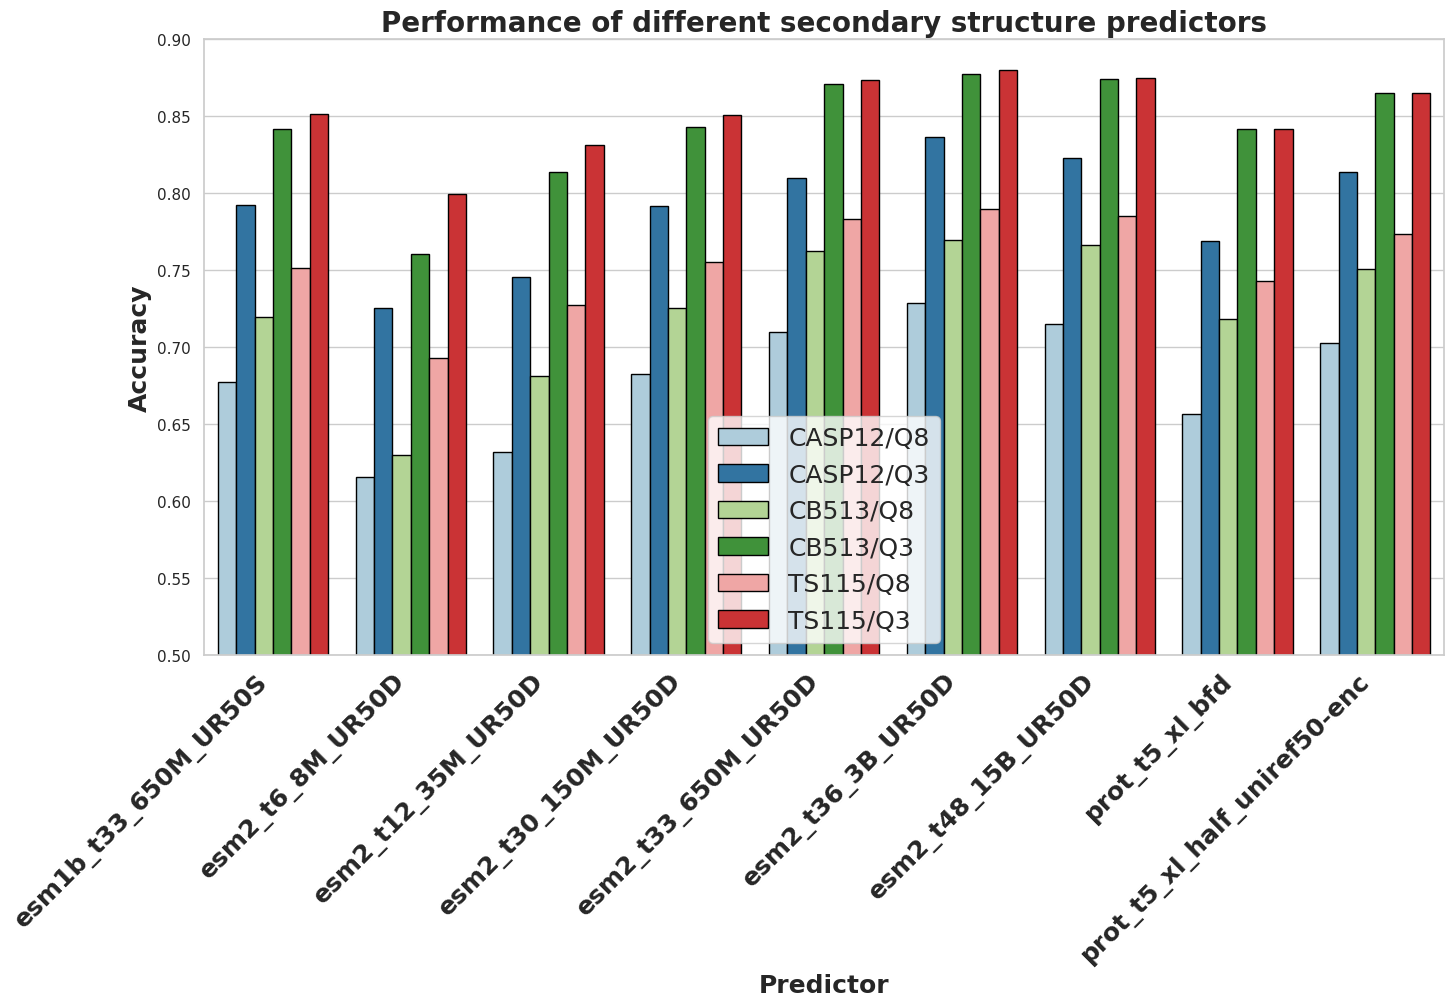

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# convert data to pandas dataframe, create seperate columns for q3 and q8
models = data.keys()
casp_q8 = [data[model]['casp12']['q8'] for model in models]
casp_q3 = [data[model]['casp12']['q3'] for model in models]
cb_q8 = [data[model]['cb513']['q8'] for model in models]
cb_q3 = [data[model]['cb513']['q3'] for model in models]
ts_q8 = [data[model]['ts115']['q8'] for model in models]
ts_q3 = [data[model]['ts115']['q3'] for model in models]
df = pd.DataFrame([casp_q8, casp_q3, cb_q8, cb_q3, ts_q8, ts_q3]).T
df.columns = ['CASP12/Q8', 'CASP12/Q3', 'CB513/Q8', 'CB513/Q3', 'TS115/Q8', 'TS115/Q3']
df['Model'] = models
# draw grouped bars
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 8))
pal = sns.color_palette("Paired")
ax = sns.barplot(x="Model", y="value", hue="variable", data=pd.melt(df, ['Model']), palette=pal, linewidth=1, edgecolor='black')
# set y axis range
ax.set(ylim=(0.5, 0.9))
# set title, x and y labels
plt.title('Performance of different secondary structure predictors', fontsize=20, fontweight='bold')
plt.xlabel('Predictor', fontsize=18, fontweight='bold')
plt.ylabel('Accuracy', fontsize=18, fontweight='bold')
plt.legend(loc='lower center', fontsize=18)
# x axis label rotate 45 degree, fontsize 18
plt.xticks(rotation=45, fontsize=18, fontweight='bold', ha='right')
# plot box black line width 2
sns.set_style("whitegrid", {'axes.linewidth': 2})

#  Intrinsically disordered proteins

In [2]:
data = {
    'esm1b_t33_650M_UR50S': { 
        'test' : { 'AUC': 0.8335, 'F1' : 0.6354, 'MCC' : 0.5028, 'F1 (F.)' : 0.7143, 'MCC (F.)' : 0.6712},
        'caid' : { 'AUC': 0.8131, 'F1' : 0.4879, 'MCC' : 0.3787, 'F1 (F.)' : 0.6306, 'MCC (F.)' : 0.6104},
    },
    'esm2_t6_8M_UR50D' : {
        'test' : { 'AUC': 0.8246, 'F1' : 0.6083, 'MCC' : 0.4679, 'F1 (F.)' : 0.5660, 'MCC (F.)' : 0.4930},
        'caid' : { 'AUC': 0.8016, 'F1' : 0.4291, 'MCC' : 0.3262, 'F1 (F.)' : 0.6022, 'MCC (F.)' : 0.5717},
    },
    'esm2_t12_35M_UR50D' : {
        'test' : { 'AUC': 0.8298, 'F1' : 0.6168, 'MCC' : 0.4677, 'F1 (F.)' : 0.5846, 'MCC (F.)' : 0.5252},
        'caid' : { 'AUC': 0.8064, 'F1' : 0.4730, 'MCC' : 0.3584 , 'F1 (F.)' : 0.5714, 'MCC (F.)' : 0.5507},
    },
    'esm2_t30_150M_UR50D' : {
        'test' : { 'AUC': 0.8349, 'F1' : 0.5966, 'MCC' : 0.4698, 'F1 (F.)' : 0.6667, 'MCC (F.)' : 0.6140},
        'caid' : { 'AUC': 0.8050, 'F1' : 0.4226, 'MCC' : 0.3164, 'F1 (F.)' : 0.6190, 'MCC (F.)' : 0.5944},
    },
    'esm2_t33_650M_UR50D' : {
        'test' : { 'AUC': 0.8291, 'F1' : 0.6062, 'MCC' : 0.4530, 'F1 (F.)' : 0.5652, 'MCC (F.)' : 0.5006},
        'caid' : { 'AUC': 0.8199, 'F1' : 0.4565, 'MCC' : 0.3433, 'F1 (F.)' : 0.6591, 'MCC (F.)' : 0.6344},
    },
    'esm2_t36_3B_UR50D' : {
        'test' : { 'AUC': 0.8170, 'F1' : 0.5887, 'MCC' : 0.4319, 'F1 (F.)' : 0.6154, 'MCC (F.)' : 0.5644},
        'caid' : { 'AUC': 0.8153, 'F1' : 0.4756, 'MCC' : 0.3633, 'F1 (F.)' : 0.6250, 'MCC (F.)' : 0.6050},
    },
    'prot_t5_xl_bfd' : {
        'test' : { 'AUC': 0.8333, 'F1' : 0.6216, 'MCC' : 0.4887, 'F1 (F.)' : 0.6038, 'MCC (F.)' : 0.5376},
        'caid' : { 'AUC': 0.8207, 'F1' : 0.4697, 'MCC' : 0.3669, 'F1 (F.)' : 0.5321, 'MCC (F.)' : 0.4995},
    },
    'prot_t5_xl_half_uniref50-enc' : {
        'test' : { 'AUC': 0.8297, 'F1' : 0.6146, 'MCC' : 0.4684, 'F1 (F.)' : 0.6190, 'MCC (F.)' : 0.5762},
        'caid' : { 'AUC': 0.8259, 'F1' : 0.5008, 'MCC' : 0.3927, 'F1 (F.)' : 0.6667, 'MCC (F.)' : 0.6412},
    },
    'ensemble' : {
        'test' : { 'AUC': 0.8481, 'F1' : 0.6337, 'MCC' : 0.5049, 'F1 (F.)' : 0.6780, 'MCC (F.)' : 0.6316},
        'caid' : { 'AUC': 0.8336, 'F1' : 0.4774, 'MCC' : 0.3723, 'F1 (F.)' : 0.6239, 'MCC (F.)' : 0.6013},
    },
}

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 渐变色
palette = sns.color_palette("tab10")
palette 

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [ ]:
# set dpi
plt.rcParams['figure.dpi'] = 1200
fig, ax = plt.subplots(figsize=(18, 6))
# set up horizontal grid lines, no vertical lines
ax.grid(False)
ax.grid(axis='y', linestyle='--')


models = data.keys()
test_auc = [data[model]['test']['AUC'] for model in models]
test_f1 = [data[model]['test']['F1'] for model in models]
test_mcc = [data[model]['test']['MCC'] for model in models]
test_f1_f = [data[model]['test']['F1 (F.)'] for model in models]
test_mcc_f = [data[model]['test']['MCC (F.)'] for model in models]
caid_auc = [data[model]['caid']['AUC'] for model in models]
caid_f1 = [data[model]['caid']['F1'] for model in models]
caid_mcc = [data[model]['caid']['MCC'] for model in models]
caid_f1_f = [data[model]['caid']['F1 (F.)'] for model in models]
caid_mcc_f = [data[model]['caid']['MCC (F.)'] for model in models]
caid_f1_f = [data[model]['caid']['F1 (F.)'] for model in models]
caid_mcc_f = [data[model]['caid']['MCC (F.)'] for model in models]


x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

rects1 = ax.bar(x - 3*width, test_auc, width, label='Test AUC', color=palette[0])
rects2 = ax.bar(x - 2*width, test_f1, width, label='Test F1', color=palette[1])
rects3 = ax.bar(x - width, test_mcc, width, label='Test MCC', color=palette[2])
rects4 = ax.bar(x, test_f1_f, width, label='Test F1 (F.)', color=palette[3])
rects5 = ax.bar(x + width, test_mcc_f, width, label='Test MCC (F.)', color=palette[4])
rects6 = ax.bar(x + 2*width, caid_auc, width, label='CAID AUC', color=palette[5])
rects7 = ax.bar(x + 3*width, caid_f1, width, label='CAID F1', color=palette[6])
rects8 = ax.bar(x + 4*width, caid_mcc, width, label='CAID MCC', color=palette[7])
rects9 = ax.bar(x + 5*width, caid_f1_f, width, label='CAID F1 (F.)', color=palette[8])
rects10 = ax.bar(x + 6*width, caid_mcc_f, width, label='CAID MCC (F.)', color=palette[9])



ax.set_ylim(0.6, 0.9)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, fontsize=12)


# ax.axhline(y=0.88, color='gray', linestyle='--')
# ax.annotate('88% Theoretical Bound', xy=(0.5, 0.88), xytext=(0.5, 0.88), fontsize=16, color='Blue')

ax.legend(loc='lower right', fontsize=10)